# STOCK PRICE PREDICTION USING MACHINE LEARNING LINEAR REGRESSION AND DECISION TREE MODEL

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
plt.style.use('bmh')

In [2]:
#reading data from local system
df= pd.read_csv('tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.shape

(2416, 7)

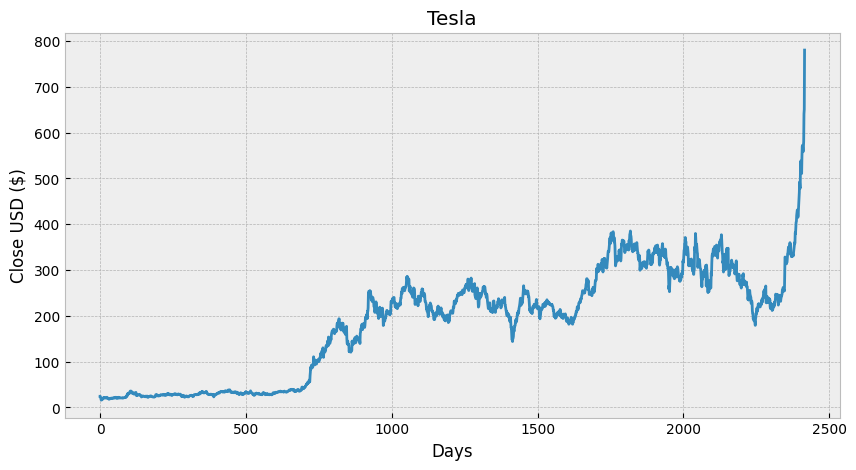

In [4]:
plt.figure(figsize=(10,5))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close USD ($)') 
plt.plot(df['Close'])
plt.show()

In [5]:
df=df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [6]:
future_days =25
df['Prediction']= df[['Close']].shift(-future_days)
df.tail(4) 

,Close,Prediction
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [7]:
X=np.array(df.drop(['Prediction'],1))[:-future_days] 
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [419.220001]
 [425.25    ]
 [430.940002]]


C:\Users\anilr\AppData\Local\Temp\ipykernel_11684\3571875134.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [8]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 21.26      20.450001  19.59     ... 640.809998 650.570007 780.      ]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [10]:
x_train.shape

(1793, 1)

In [11]:
x_test.shape

(598, 1)

In [12]:
#Get the last  
x_future =df.drop(['Prediction'],1)[:-future_days]

x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[352.220001]
 [354.829987]
 [333.040009]
 [336.339996]
 [328.920013]
 [331.290009]
 [329.940002]
 [334.869995]
 [336.200012]
 [333.029999]
 [330.369995]
 [335.890015]
 [339.529999]
 [348.839996]
 [352.700012]
 [359.679993]
 [358.390015]
 [381.5     ]
 [378.98999 ]
 [393.149994]
 [404.040009]
 [405.589996]
 [419.220001]
 [425.25    ]
 [430.940002]]


C:\Users\anilr\AppData\Local\Temp\ipykernel_11684\1425803580.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future =df.drop(['Prediction'],1)[:-future_days]


In [13]:
#Create the models 
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train,max_depth,min_samples_leaf)
#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train) 

In [14]:
# show the model tree prediction 
tree_prediction= tree.predict(x_future)
print(tree_prediction)

[252.479996 414.700012 418.329987 430.26001  443.01001  451.540009
 469.059998 492.140015 334.769989 478.149994 469.059998 537.919983
 518.5      513.48999  510.5      547.200012 344.970001 572.200012
 564.820007 337.019989 580.98999  580.98999  640.809998 650.570007
 780.      ]


In [15]:
# show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[357.78509964 360.39006452 338.64200627 341.93564473 334.52993636
 336.89537294 335.54796309 340.46847173 341.79593003 338.63201553
 335.97712887 341.48652941 345.11951077 354.41159712 358.26418719
 365.23074004 363.94324371 387.00876952 384.5035883  398.63635116
 409.50541586 411.05242098 424.65620445 430.67460289 436.35365841]


C:\Users\anilr\AppData\Local\Temp\ipykernel_11684\4198612243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


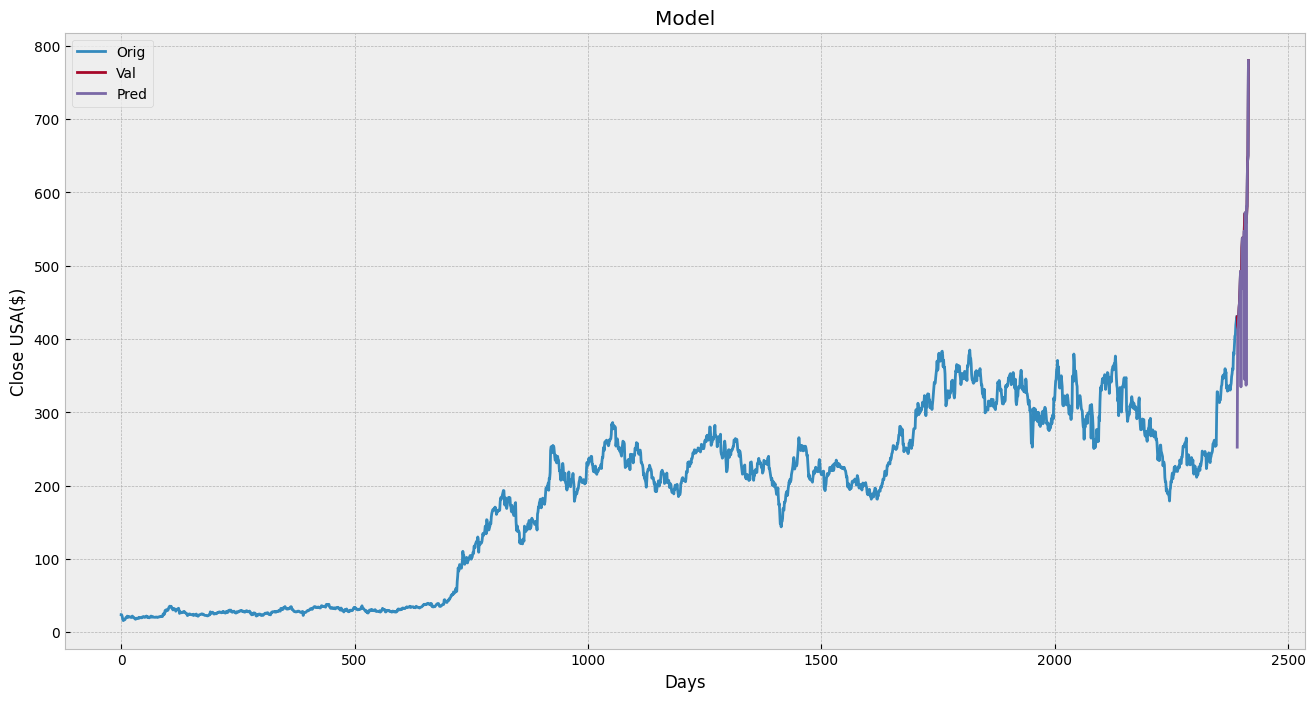

In [16]:
#visual the data
predictions = tree_prediction
valid= df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USA($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\anilr\AppData\Local\Temp\ipykernel_11684\4168433613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


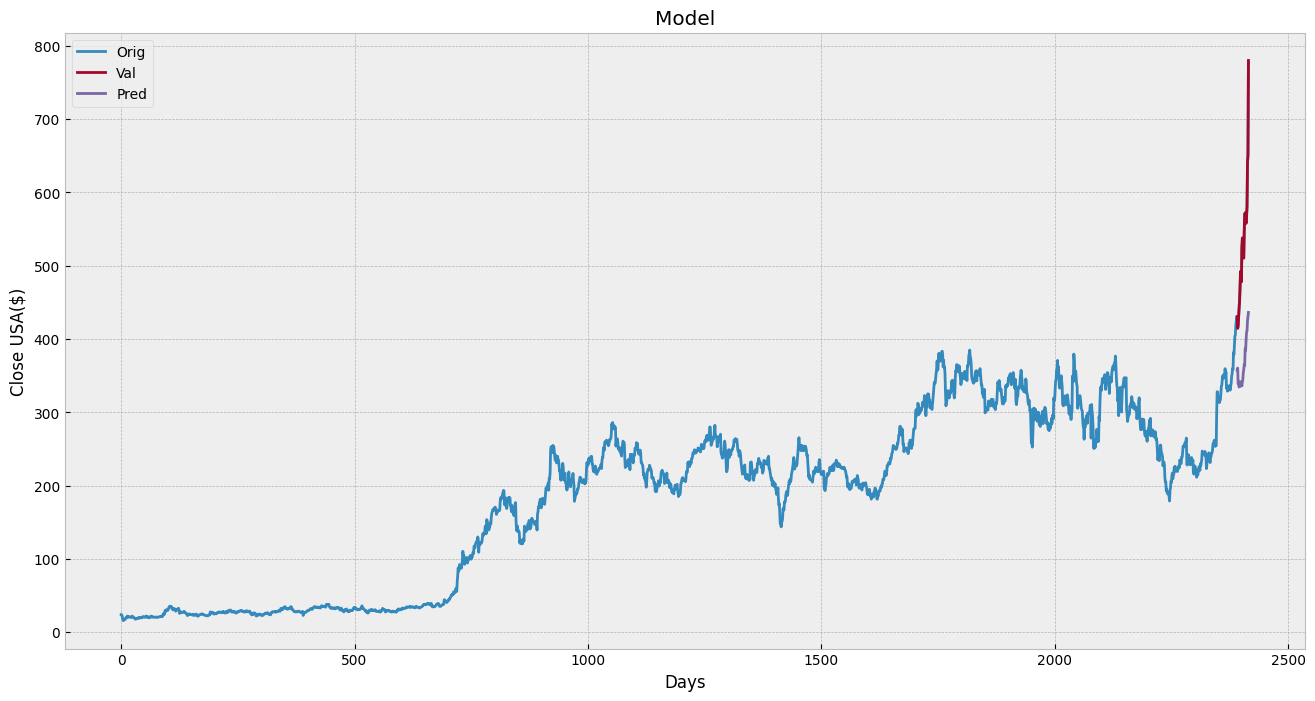

In [17]:
#visual the data
predictions = lr_prediction
valid= df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USA($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
lr.score(x_train,y_train)

0.9197221315393778

In [20]:
tree.score(x_train,y_train)

0.9984849494341763

In [21]:
import pickle 
pickle.dump(tree,open('model.pkl','wb'))

TypeError: plot_tree() got an unexpected keyword argument 'max_leaf_nodes'

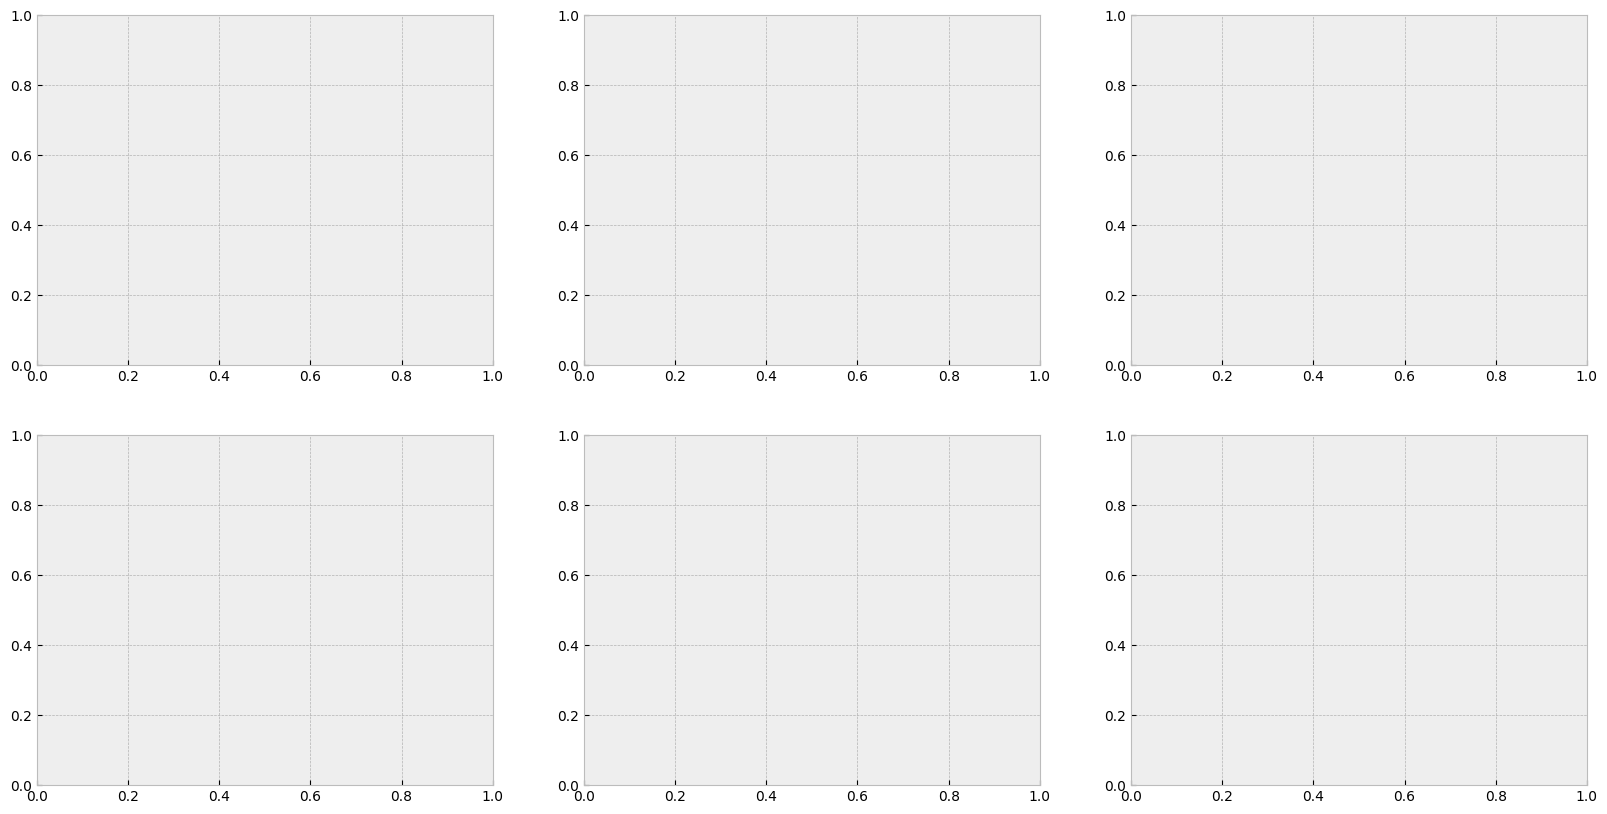

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, ax in enumerate(axes.ravel()):
    plt.sca(ax)
    plot_tree(tree, feature_names=df, class_names=df, max_leaf_nodes=1)
    ax.remove()
